# **Importing Library**

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# **Loading the dataset**

In [32]:
dataset=pd.read_csv('data.csv')

# **View for your data**

In [5]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
dataset.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [10]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
dataset.shape

(918, 12)

In [12]:
dataset.corr()

<ipython-input-12-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [13]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [14]:
dataset.duplicated().sum()

0

# **Data Visualization**   

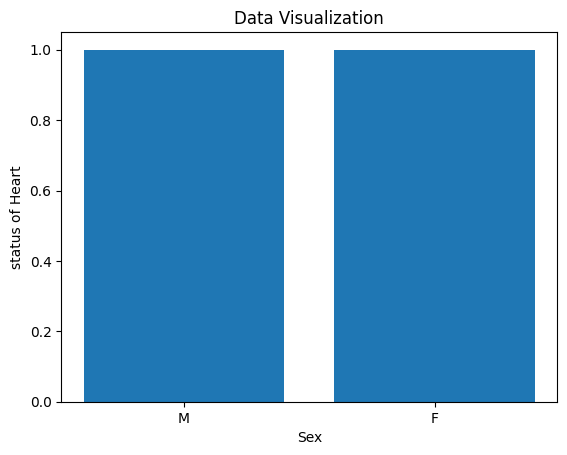

In [15]:
plt.bar(dataset['Sex'], dataset['HeartDisease'])
plt.title("Data Visualization")
plt.xlabel('Sex')
plt.ylabel('status of Heart')
plt.show()

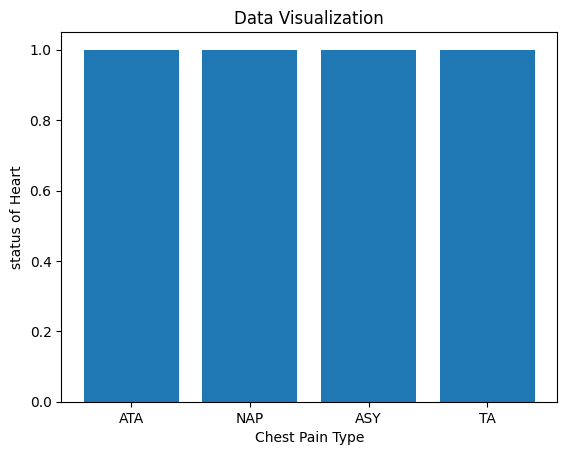

In [16]:
plt.bar(dataset['ChestPainType'], dataset['HeartDisease'])
plt.title("Data Visualization")
plt.xlabel('Chest Pain Type')
plt.ylabel('status of Heart')
plt.show()

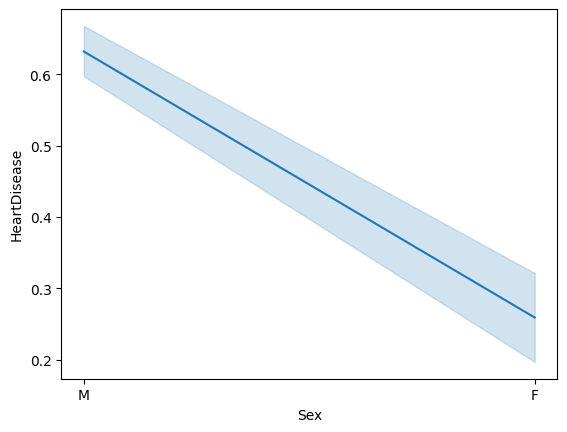

In [17]:
sns.lineplot(x="Sex", y="HeartDisease", data=dataset)

plt.title('')

plt.show()

# ***preprocessing***

# **Missing data Imputation**

If your data has missing values, you have several options to solve it, such as:


1.   Drop the row
2.   Fill the  value



# **Outlier Detection**

Text(0.5, 1.0, 'Boxplot to know age range ')

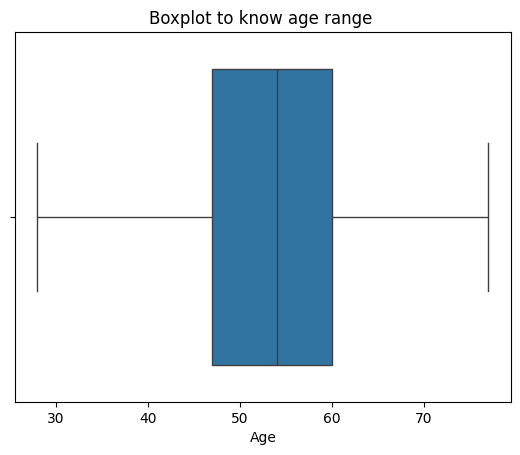

In [18]:
sns.boxplot(data=dataset,x=dataset["Age"])
plt.title("Boxplot to know age range ")

Text(0.5, 1.0, 'Boxplot to know RestingBP range ')

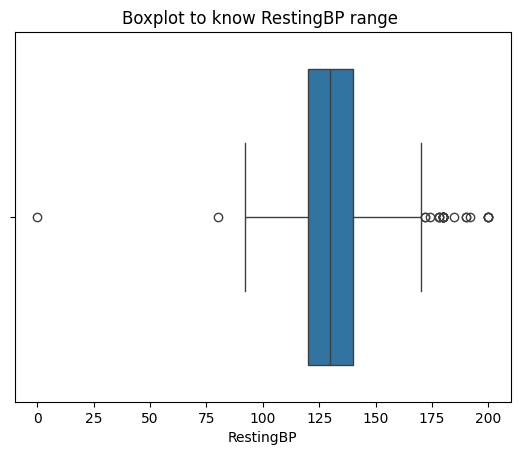

In [19]:
sns.boxplot(data=dataset,x=dataset["RestingBP"])
plt.title("Boxplot to know RestingBP range ")

Text(0.5, 1.0, 'Boxplot to know Cholesterol range ')

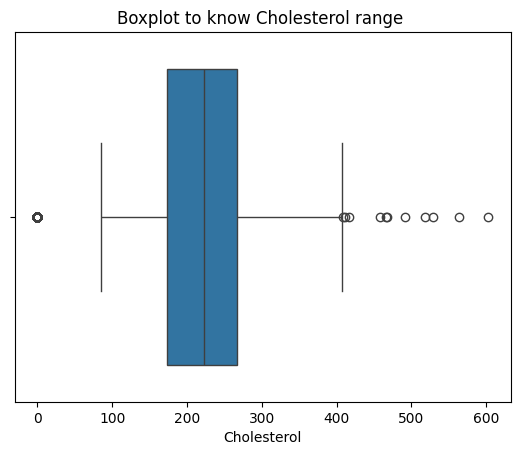

In [20]:
sns.boxplot(data=dataset,x=dataset["Cholesterol"])
plt.title("Boxplot to know Cholesterol range ")

Text(0.5, 1.0, 'Boxplot to know MaxHR range ')

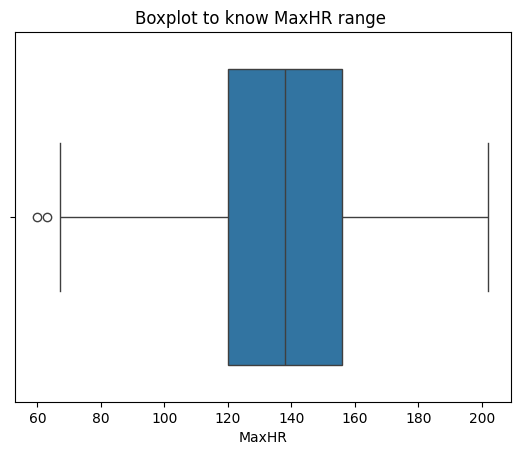

In [21]:
sns.boxplot(data=dataset,x=dataset["MaxHR"])
plt.title("Boxplot to know MaxHR range ")

# **Outlier Imputation**
*options Handling non-error outliers*
Keep
Delete
Recode

In [22]:
def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   df = lower
   return df

In [23]:
dataset["RestingBP"] = impute_outliers_IQR(dataset['RestingBP'])
dataset["Cholesterol"] = impute_outliers_IQR(dataset['Cholesterol'])

Text(0.5, 1.0, 'Boxplot to know RestingBP range ')

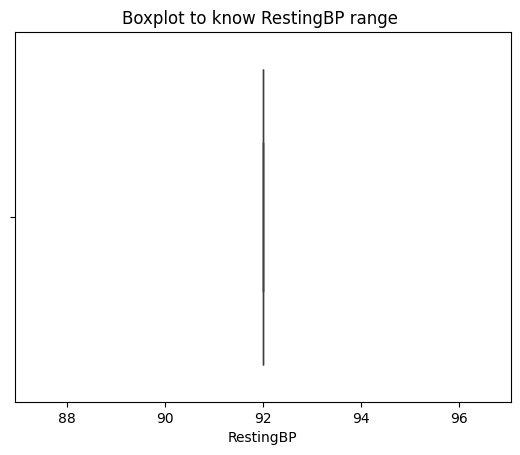

In [25]:
sns.boxplot(data=dataset,x=dataset["RestingBP"])
plt.title("Boxplot to know RestingBP range ")

In [24]:
dataset["RestingBP"]

0      92
1      92
2      92
3      92
4      92
       ..
913    92
914    92
915    92
916    92
917    92
Name: RestingBP, Length: 918, dtype: int64

In [26]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,92,85,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,92,85,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,92,85,0,ST,98,N,0.0,Up,0
3,48,F,ASY,92,85,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,92,85,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,92,85,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,92,85,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,92,85,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,92,85,0,LVH,174,N,0.0,Flat,1


# **Handling categorical features**

# **LabelEncoder**

In [27]:
lb = LabelEncoder()
dataset['Sex']=lb.fit_transform(dataset['Sex'])
dataset['ChestPainType']=lb.fit_transform(dataset['ChestPainType'])
dataset['RestingECG']=lb.fit_transform(dataset['RestingECG'])
dataset['ExerciseAngina']=lb.fit_transform(dataset['ExerciseAngina'])
dataset['ST_Slope']=lb.fit_transform(dataset['ST_Slope'])

In [28]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,92,85,0,1,172,0,0.0,2,0
1,49,0,2,92,85,0,1,156,0,1.0,1,1
2,37,1,1,92,85,0,2,98,0,0.0,2,0
3,48,0,0,92,85,0,1,108,1,1.5,1,1
4,54,1,2,92,85,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,92,85,0,1,132,0,1.2,1,1
914,68,1,0,92,85,1,1,141,0,3.4,1,1
915,57,1,0,92,85,0,1,115,1,1.2,1,1
916,57,0,1,92,85,0,0,174,0,0.0,1,1


# **One-Hot Encoding**

In [41]:
OH = OneHotEncoder()
dataset['ChestPainType']=OH.fit_transform(dataset['ChestPainType'].to_numpy().reshape(-1, 1)).shape[0]

In [42]:
dataset['RestingECG']=OH.fit_transform(dataset['RestingECG'].to_numpy().reshape(-1, 1)).shape[0]
dataset['ExerciseAngina']=OH.fit_transform(dataset['ExerciseAngina'].to_numpy().reshape(-1, 1)).shape[0]
dataset['ST_Slope']=OH.fit_transform(dataset['ST_Slope'].to_numpy().reshape(-1, 1)).shape[0]
dataset['Sex']=OH.fit_transform(dataset['Sex'].to_numpy().reshape(-1, 1)).shape[0]

In [43]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,918,918,140,289,0,918,172,918,0.0,918,0
1,49,918,918,160,180,0,918,156,918,1.0,918,1
2,37,918,918,130,283,0,918,98,918,0.0,918,0
3,48,918,918,138,214,0,918,108,918,1.5,918,1
4,54,918,918,150,195,0,918,122,918,0.0,918,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,918,918,110,264,0,918,132,918,1.2,918,1
914,68,918,918,144,193,1,918,141,918,3.4,918,1
915,57,918,918,130,131,0,918,115,918,1.2,918,1
916,57,918,918,130,236,0,918,174,918,0.0,918,1


***transformation***

In [44]:
maximum=dataset['Age'].max()
minimum=dataset['Age'].min()
print('min ',minimum,'  &  Max = ', maximum)
roomRange= maximum - minimum
width = int(roomRange/10)
width
# lets create new min and max values for our interval with rounded min and max values of RoomService
min_value = int(np.floor(minimum))
max_value = int(np.ceil( maximum))
print(" min-->",min_value,"\n","max-->",max_value,"\n","inerval_width-->",width)

intervals = [i for i in range(min_value, max_value + width,width)]
intervals
dataset['Age'] = pd.cut(x=dataset['Age'], bins=intervals, include_lowest=True)

min  28   &  Max =  77
 min--> 28 
 max--> 77 
 inerval_width--> 4


In [45]:
dataset['Age']=lb.fit_transform(dataset['Age'])

# **Handling Numerical values**

In [46]:
scaler_1= MinMaxScaler(feature_range=(0, 1))

In [47]:
dataset[['RestingBP','Cholesterol']]=scaler_1.fit_transform(dataset[['RestingBP','Cholesterol']])

In [48]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,918,918,0.70,0.479270,0,918,172,918,0.0,918,0
1,5,918,918,0.80,0.298507,0,918,156,918,1.0,918,1
2,2,918,918,0.65,0.469320,0,918,98,918,0.0,918,0
3,4,918,918,0.69,0.354892,0,918,108,918,1.5,918,1
4,6,918,918,0.75,0.323383,0,918,122,918,0.0,918,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,4,918,918,0.55,0.437811,0,918,132,918,1.2,918,1
914,9,918,918,0.72,0.320066,1,918,141,918,3.4,918,1
915,7,918,918,0.65,0.217247,0,918,115,918,1.2,918,1
916,7,918,918,0.65,0.391376,0,918,174,918,0.0,918,1


In [49]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,918,918,0.70,0.479270,0,918,172,918,0.0,918,0
1,5,918,918,0.80,0.298507,0,918,156,918,1.0,918,1
2,2,918,918,0.65,0.469320,0,918,98,918,0.0,918,0
3,4,918,918,0.69,0.354892,0,918,108,918,1.5,918,1
4,6,918,918,0.75,0.323383,0,918,122,918,0.0,918,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,4,918,918,0.55,0.437811,0,918,132,918,1.2,918,1
914,9,918,918,0.72,0.320066,1,918,141,918,3.4,918,1
915,7,918,918,0.65,0.217247,0,918,115,918,1.2,918,1
916,7,918,918,0.65,0.391376,0,918,174,918,0.0,918,1
